In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.layers import LSTM

In [25]:
df = pd.read_csv(r"C:\Users\Zahid.Shaikh\100days\91\Gold Price (2013-2023).csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
...,...,...,...,...,...,...,...
2578,01/08/2013,"1,663.20","1,651.50","1,662.60","1,648.80",0.13K,0.97%
2579,01/07/2013,"1,647.20","1,657.30","1,663.80","1,645.30",0.09K,-0.16%
2580,01/04/2013,"1,649.90","1,664.40","1,664.40","1,630.00",0.31K,-1.53%
2581,01/03/2013,"1,675.60","1,688.00","1,689.30","1,664.30",0.19K,-0.85%


In [26]:
print('-' * 100)
print("Rows: ", df.shape[0])
print("Columns: ", df.shape[1])
print('-' * 100)
print("Columns: \n", df.columns)
print('-' * 100)
print("Null Values: \n", df.isna().sum())
print('-' * 100)
print("Unique Values: \n", df.nunique())
print('-' * 100)
print("Info: ")
print(df.info())
print('-' * 100)

----------------------------------------------------------------------------------------------------
Rows:  2583
Columns:  7
----------------------------------------------------------------------------------------------------
Columns: 
 Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')
----------------------------------------------------------------------------------------------------
Null Values: 
 Date        0
Price       0
Open        0
High        0
Low         0
Vol.        5
Change %    0
dtype: int64
----------------------------------------------------------------------------------------------------
Unique Values: 
 Date        2583
Price       2072
Open        2061
High        2044
Low         2019
Vol.        1550
Change %     474
dtype: int64
----------------------------------------------------------------------------------------------------
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2583 entries, 0 to 2582
Data columns (total 

In [27]:
df.drop(['Vol.', 'Change %'], axis=1, inplace=True)

In [28]:
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

NumCols = df.columns.drop(['Date'])
df[NumCols] = df[NumCols].replace({',': ''}, regex=True)
df[NumCols] = df[NumCols].astype('float64')

In [29]:
df.head()

,Date,Price,Open,High,Low
0,2013-01-02,1689.9,1675.8,1695.0,1672.1
1,2013-01-03,1675.6,1688.0,1689.3,1664.3
2,2013-01-04,1649.9,1664.4,1664.4,1630.0
3,2013-01-07,1647.2,1657.3,1663.8,1645.3
4,2013-01-08,1663.2,1651.5,1662.6,1648.8


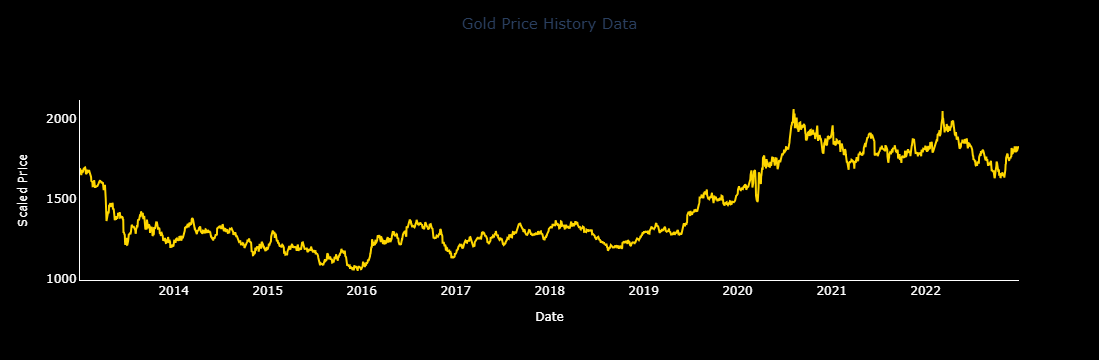

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.Date,
    y=df.Price,
    mode='lines',
    line=dict(color='#FFD700', width=2),
    name='Gold Price'
))

fig.update_layout(
    title={
        'text': "Gold Price History Data",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15}
    },
    xaxis=dict(
        title='Date',
        titlefont=dict(size=12, color='white'),
        tickfont=dict(color='white'),
        showgrid=False,
        showline=True,
        linecolor='white',
    ),
    yaxis=dict(
        title='Scaled Price',
        titlefont=dict(size=12, color='white'),
        tickfont=dict(color='white'),
        showgrid=False,
        showline=True,
        linecolor='white',
    ),
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(
        font=dict(size=12, color='white'),
        bgcolor='rgba(0,0,0,0)'  
    )
)

fig.show()


In [31]:
test_size = df[df.Date.dt.year==2022].shape[0]
test_size

260

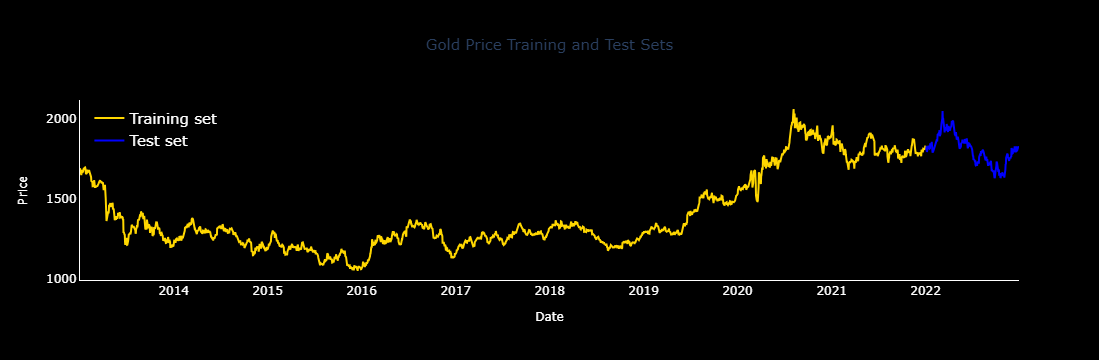

In [32]:
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=df.Date[:-test_size],
    y=df.Price[:-test_size],
    mode='lines',
    line=dict(color='#FFD700', width=2),
    name='Training set'
))

fig.add_trace(go.Scatter(
    x=df.Date[-test_size:],
    y=df.Price[-test_size:],
    mode='lines',
    line=dict(color='blue', width=2),
    name='Test set'
))

fig.update_layout(
    title={
        'text': 'Gold Price Training and Test Sets',
        'font': {'size': 15},
        'x': 0.5,  
    },
    xaxis=dict(
        title='Date',
        titlefont=dict(size=12, color='white'),
        tickfont=dict(color='white'),
        showgrid=False,
        showline=True,
        linecolor='white',
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(size=12, color='white'),
        tickfont=dict(color='white'),
        showgrid=False,
        showline=True,
        linecolor='white',
    ),
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(
        font=dict(size=15, color='white'),
        x=0.01, y=0.99,  
        bgcolor='rgba(0,0,0,0)'  
    )
)

fig.show()


In [35]:
scaler = MinMaxScaler()
scaler.fit(df.Price.values.reshape(-1,1))
window_size = 60

In [36]:
train_data = df.Price[:-test_size]
train_data = scaler.transform(train_data.values.reshape(-1,1))
X_train = []
y_train = []

for i in range(window_size, len(train_data)):
    X_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

In [37]:
test_data = df.Price[-test_size-60:]
test_data = scaler.transform(test_data.values.reshape(-1,1))
X_test = []
y_test = []

for i in range(window_size, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    y_test.append(test_data[i, 0])

In [38]:
X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(y_train)
y_test  = np.array(y_test)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test  = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
y_train = np.reshape(y_train, (-1,1))
y_test  = np.reshape(y_test, (-1,1))

print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (2263, 60, 1)
y_train Shape:  (2263, 1)
X_test Shape:   (260, 60, 1)
y_test Shape:   (260, 1)


In [46]:
def define_model():
    input1 = Input(shape=(window_size,1))
    x = LSTM(units = 64, return_sequences=True)(input1)  
    x = Dropout(0.2)(x)
    x = LSTM(units = 64, return_sequences=True)(x)
    x = Dropout(0.2)(x)
    x = LSTM(units = 64)(x)
    x = Dropout(0.2)(x)
    x = Dense(32, activation='softmax')(x)
    dnn_output = Dense(1)(x)

    model = Model(inputs=input1, outputs=[dnn_output])
    model.compile(loss='mean_squared_error', optimizer='Nadam')
    model.summary()
    print('-' * 151)
    
    return model

In [47]:
model = define_model()
history = model.fit(X_train, y_train, epochs=150, batch_size=32, validation_split=0.1, verbose=1)

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 60, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 60, 64)         │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 60, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,057 (332.25 KB)

 Trainable params: 85,057 (332.25 KB)

 Non-trainable params: 0 (0.00 B)

-------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch 1/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - loss: 0.0659 - val_loss: 0.0884
Epoch 2/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - loss: 0.0145 - val_loss: 0.0449
Epoch 3/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0083 - val_loss: 0.0227
Epoch 4/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 130ms/step - loss: 0.0060 - val_loss: 0.0098
Epoch 5/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 6s 97ms/step - loss: 0.0040 - val_loss: 0.0042
Epoch 6/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 102ms/step - loss: 0.0030 - val_loss: 0.0022
Epoch 7/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 8/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 8s 121ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 9/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 106ms/step - loss: 0.0015 - val_loss: 0.0050
Epoch 10/150
64/64 ━━━━━━━━━━━━━━━━━━━━ 7s 113ms/step - loss: 0.00

In [54]:
result = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)
MAPE = mean_absolute_percentage_error(y_test, y_pred)
Accuracy = ((1 - MAPE) * 100).round(2)
print('-' * 100)
print("Test Loss:", result)
print("Test MAPE:", MAPE)
print(f"Test Accuracy: {Accuracy} %")
print('-' * 100)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0011    
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
----------------------------------------------------------------------------------------------------
Test Loss: 0.0013395322021096945
Test MAPE: 0.043236866549204646
Test Accuracy: 95.68 %
----------------------------------------------------------------------------------------------------


In [55]:
y_test_true = scaler.inverse_transform(y_test)
y_test_pred = scaler.inverse_transform(y_pred)

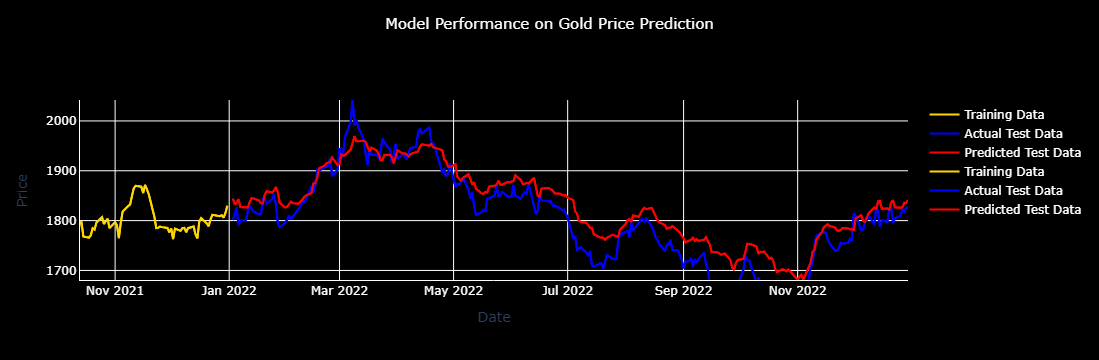

In [62]:
assert len(df['Date'].iloc[-test_size:]) == len(y_test_true), "Mismatched length for Actual Test Data"
assert len(df['Date'].iloc[-test_size:]) == len(y_test_pred), "Mismatched length for Predicted Test Data"

fig.add_trace(go.Scatter(
    x=df['Date'].iloc[:-test_size],
    y=scaler.inverse_transform(train_data).flatten(),
    mode='lines',
    line=dict(color='#FFD700', width=2),
    name='Training Data'
))

fig.add_trace(go.Scatter(
    x=df['Date'].iloc[-test_size:],
    y=np.array(y_test_true).flatten(),  
    mode='lines',
    line=dict(color='blue', width=2),
    name='Actual Test Data'
))

fig.add_trace(go.Scatter(
    x=df['Date'].iloc[-test_size:],
    y=np.array(y_test_pred).flatten(),  
    mode='lines',
    line=dict(color='red', width=2),
    name='Predicted Test Data'
))

fig.update_layout(
    title={
        'text': "Model Performance on Gold Price Prediction",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 15, 'color': 'white'}
    },
    xaxis=dict(
        title='Date',
        titlefont=dict(size=12, color='white'),
        tickfont=dict(color='white'),
        showline=True,
        linecolor='white'
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(size=12, color='white'),
        tickfont=dict(color='white'),
        showline=True,
        linecolor='white'
    ),
    plot_bgcolor='black',
    paper_bgcolor='black',
    legend=dict(
        font=dict(size=12, color='white'),
        bgcolor='rgba(0,0,0,0)'
    )
)

fig.show()
